In [1]:
import pandas as pd
import numpy as np
import json
import requests
import dateutil.parser as dp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def getToken(itemid,resourceType):
    try:
        
        if resourceType == "private":
            url = "https://authorization.iudx.org.in/auth/v1/token"
            payload = '{"itemId":"'+itemid+'","itemType": "resource","role": "consumer"}'
            headers = {
              'clientId': '6e35f7e5-b1aa-4117-8485-1acc78f054ab',
              'clientSecret': '19496cf8b6817fee23ca45e9409a4d2b6b456ada',
              'Content-Type': 'application/json'
            }
            response = requests.request("POST", url, headers=headers, data=payload)
            return str(response.json()["results"]["accessToken"])
        
        elif resourceType == "public":            
            url = "https://authorization.iudx.org.in/auth/v1/token"
            payload = '{"itemId": "rs.iudx.org.in","itemType": "resource_server","role": "consumer"}'                
            headers = {
              'clientId': '6e35f7e5-b1aa-4117-8485-1acc78f054ab',
              'clientSecret': '19496cf8b6817fee23ca45e9409a4d2b6b456ada',
              'Content-Type': 'application/json'
            }
            response = requests.request("POST", url, headers=headers, data=payload)
            return str(response.json()["results"]["accessToken"])
    
    except Exception as e:
        print("Error Occurred while fetching token -> ",e)


        

In [3]:
def getData(itemid,fromDate,toDate,baseurl,resourceType):

    ID = itemid
    fromtime = fromDate
    totime = toDate

    url=baseurl+"?id="+ID+"&timerel=during&time="+fromtime+"&endtime="+totime

    payload={}
    
    headers = {
      'token': getToken(itemid,resourceType)
    }
    
    response = requests.request("GET", url, headers=headers, data=payload)
    res = response.json()['results']
    
    return pd.DataFrame(res)



In [4]:
def checkDuplicates(df):
    if df[df.duplicated()].shape[0] != 0: 
        print("Duplicates found in the dataset ...")
        print("Total packet count : ",df.shape[0])
        print("Total duplicate packet count :", df[df.duplicated()].shape[0])
        print("Percentage of duplicates : ",round((df[df.duplicated()].shape[0]/df.shape[0])*100,2),"%")
        df.drop_duplicates(inplace=True)
#         display(df)
        return "Removed Duplicates ..."
    else:
        return "No Duplicated Found"


## Fetching Data from IUDX

In [5]:
itemid = "varanasismartcity.gov.in/62d1f729edd3d2a1a090cb1c6c89356296963d55/rs.iudx.org.in/varanasi-swm-vehicle-live/varanasi-swm-vehicle-pos"
fromDate = "2022-02-20T00:00:15Z"
to = "2022-02-20T23:59:00Z"
baseurl = "https://rs.iudx.org.in/ngsi-ld/v1/temporal/entities"

lp = getData(itemid,fromDate,to,baseurl,"private")
lp1 = lp.copy()
lp 

,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,id,bearing,ignitionStatus,location
0,UP65KT0413,38,28.0,Dumper,2022-02-20T07:42:08+05:30,Disconnected,Running,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,269.0,Y,"{'type': 'Point', 'coordinates': [82.983405, 2..."
1,HP97 7103,10,0.0,Sweeping Machine,2022-02-20T07:42:01+05:30,Disconnected,Idle,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,104.0,Y,"{'type': 'Point', 'coordinates': [82.933867, 2..."
2,UP65CW6965,4,0.0,Tractor,2022-02-20T07:42:05+05:30,Disconnected,Stopped,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,108.0,N,"{'type': 'Point', 'coordinates': [82.98551, 25..."
3,UP65JT7281,10,7.0,Auto Tipper,2022-02-20T07:42:03+05:30,Disconnected,Running,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,105.0,Y,"{'type': 'Point', 'coordinates': [82.957188, 2..."
4,UP65JT7307,38,0.0,Auto Tipper,2022-02-20T07:42:00+05:30,Disconnected,Stopped,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,269.0,N,"{'type': 'Point', 'coordinates': [82.982838, 2..."
...,...,...,...,...,...,...,...,...,...,...,...
4995,UP65JT7307,38,0.0,Auto Tipper,2022-02-20T10:05:13+05:30,Disconnected,Idle,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,114.0,Y,"{'type': 'Point', 'coordinates': [82.985425, 2..."
4996,UP65DT3331,79,22.0,Dumper,2022-02-20T10:05:06+05:30,Disconnected,Stopped,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,194.0,N,"{'type': 'Point', 'coordinates': [82.972583, 2..."
4997,UP65HT0322,29,5.0,Auto Tipper,2022-02-20T10:05:01+05:30,Disconnected,Stopped,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,78.0,N,"{'type': 'Point', 'coordinates': [82.99054, 25..."
4998,UP65JT 7308,17,0.0,Auto Tipper,2022-02-20T10:04:41+05:30,Disconnected,Idle,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,188.0,Y,"{'type': 'Point', 'coordinates': [82.970817, 2..."


##### Viewing the columns and their data types

In [6]:
lp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   license_plate         5000 non-null   object 
 1   wardID                5000 non-null   object 
 2   speed                 5000 non-null   float64
 3   vehicleType           5000 non-null   object 
 4   observationDateTime   5000 non-null   object 
 5   deviceBatteryStatus   5000 non-null   object 
 6   vehicleRunningStatus  5000 non-null   object 
 7   id                    5000 non-null   object 
 8   bearing               5000 non-null   float64
 9   ignitionStatus        5000 non-null   object 
 10  location              5000 non-null   object 
dtypes: float64(2), object(9)
memory usage: 429.8+ KB


In [7]:
lp["observationDateTime"]=pd.to_datetime(lp["observationDateTime"],errors ='coerce')
lp["date"] = lp["observationDateTime"].dt.date
lp['type'] = lp['location'].apply(lambda x: x['type'])
lp['lat'] = lp['location'].apply(lambda x: x['coordinates'][1])
lp['long'] = lp['location'].apply(lambda x: x['coordinates'][0])
lp.drop(["id","location"],axis=1,inplace=True)
lp

,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,bearing,ignitionStatus,date,type,lat,long
0,UP65KT0413,38,28.0,Dumper,2022-02-20 07:42:08+05:30,Disconnected,Running,269.0,Y,2022-02-20,Point,25.345525,82.983405
1,HP97 7103,10,0.0,Sweeping Machine,2022-02-20 07:42:01+05:30,Disconnected,Idle,104.0,Y,2022-02-20,Point,25.364967,82.933867
2,UP65CW6965,4,0.0,Tractor,2022-02-20 07:42:05+05:30,Disconnected,Stopped,108.0,N,2022-02-20,Point,25.313317,82.985510
3,UP65JT7281,10,7.0,Auto Tipper,2022-02-20 07:42:03+05:30,Disconnected,Running,105.0,Y,2022-02-20,Point,25.363457,82.957188
4,UP65JT7307,38,0.0,Auto Tipper,2022-02-20 07:42:00+05:30,Disconnected,Stopped,269.0,N,2022-02-20,Point,25.352633,82.982838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UP65JT7307,38,0.0,Auto Tipper,2022-02-20 10:05:13+05:30,Disconnected,Idle,114.0,Y,2022-02-20,Point,25.352153,82.985425
4996,UP65DT3331,79,22.0,Dumper,2022-02-20 10:05:06+05:30,Disconnected,Stopped,194.0,N,2022-02-20,Point,25.299017,82.972583
4997,UP65HT0322,29,5.0,Auto Tipper,2022-02-20 10:05:01+05:30,Disconnected,Stopped,78.0,N,2022-02-20,Point,25.280300,82.990540
4998,UP65JT 7308,17,0.0,Auto Tipper,2022-02-20 10:04:41+05:30,Disconnected,Idle,188.0,Y,2022-02-20,Point,25.368390,82.970817


##### Viewing the statistics of various properties

In [8]:
lp.describe()[['speed','bearing']]

,speed,bearing
count,5000.000000,5000.000000
mean,8.555400,172.836800
std,12.627891,103.511141
min,0.000000,0.000000
25%,0.000000,89.000000
50%,0.000000,180.000000
75%,13.000000,263.250000
max,80.000000,359.000000


In [9]:
lp.describe(include='object')[['license_plate','wardID','vehicleType']]

,license_plate,wardID,vehicleType
count,5000,5000,5000
unique,77,66,8
top,UP65KT0867,0,Auto Tipper
freq,130,567,3055


##### Checking For Duplicates

In [10]:
checkDuplicates(lp)

'No Duplicated Found'

##### Extracting Ward list

In [11]:
wardIDs = lp["wardID"].unique()
wardIDs.sort(axis=0)
wardIDs
# Inference 
# WardIDs do not match the wardNum in employee attendance dataset

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4',
       '40', '41', '42', '45', '5', '51', '55', '56', '57', '58', '59',
       '6', '60', '62', '63', '64', '65', '67', '68', '69', '7', '72',
       '73', '76', '77', '78', '79', '80', '81', '84', '86', '9', '90'],
      dtype=object)

##### Maximum speed achieved by each vehicle type

,vehicleType,speed
0,Auto Tipper,80.0
5,Refused Compactor,48.0
1,Dumper,45.0
2,Dumper Placer,43.0
4,Hydraulic Lifter,38.0
3,Hopper,30.0
7,Tractor,20.0
6,Sweeping Machine,1.0


Text(0.5, 1.0, 'Maximum Speed by Vehicle Type')

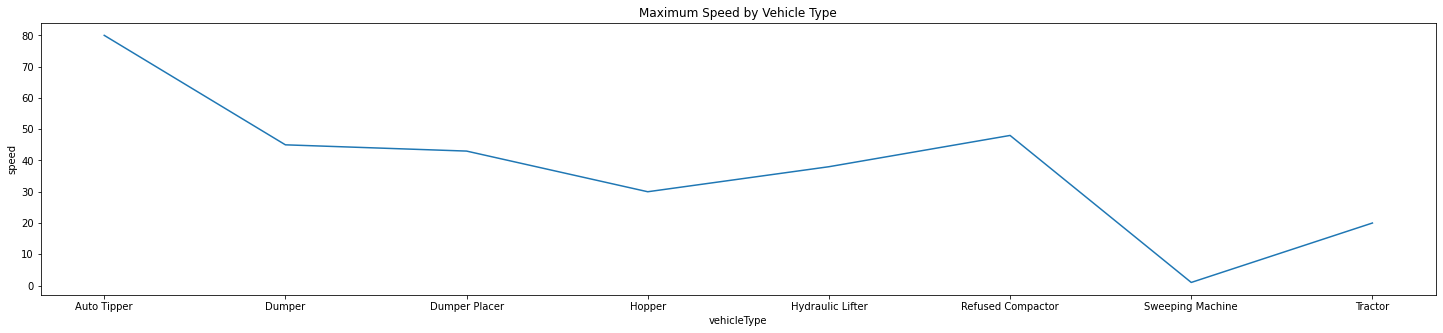

In [12]:
vehicleType_Speed = lp.groupby(["vehicleType"])[["speed"]].max()
vehicleType_Speed.reset_index(inplace=True)
display(vehicleType_Speed.sort_values(by=["speed"],ascending=False))

fig,ax1=plt.subplots(figsize=(25,5))
sns.lineplot(x="vehicleType",y="speed",data=vehicleType_Speed ,ax=ax1).set_title("Maximum Speed by Vehicle Type")



##### Visualizing relation between Speed and Ignition Status

In [13]:

display(lp[(lp["vehicleRunningStatus"]=="Stopped") & (lp["speed"]!=0.0)])
print(lp[(lp["vehicleRunningStatus"]=="Stopped") & (lp["speed"]!=0.0)]["ignitionStatus"].value_counts())

#Inference 
# Ignition Status is N for Stopped Vehicles yet, Speed is non-zero


,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,bearing,ignitionStatus,date,type,lat,long
302,UP65JT7276,12,1.0,Auto Tipper,2022-02-20 07:52:57+05:30,Disconnected,Stopped,125.0,N,2022-02-20,Point,25.348845,83.010600
777,UP65GT9528,65,1.0,Auto Tipper,2022-02-20 08:08:58+05:30,Disconnected,Stopped,126.0,N,2022-02-20,Point,25.312862,83.007948
792,UP65JT7316,38,15.0,Auto Tipper,2022-02-20 08:09:10+05:30,Disconnected,Stopped,87.0,N,2022-02-20,Point,25.352845,82.984120
888,UP65HT0322,3,5.0,Auto Tipper,2022-02-20 08:11:09+05:30,Disconnected,Stopped,246.0,N,2022-02-20,Point,25.318527,82.987942
970,UP65HT0322,32,10.0,Auto Tipper,2022-02-20 08:14:17+05:30,Disconnected,Stopped,167.0,N,2022-02-20,Point,25.318205,82.988365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,UP65DT3331,59,8.0,Dumper,2022-02-20 10:03:59+05:30,Disconnected,Stopped,168.0,N,2022-02-20,Point,25.302757,82.973178
4960,UP65HT0322,29,15.0,Auto Tipper,2022-02-20 10:04:24+05:30,Disconnected,Stopped,193.0,N,2022-02-20,Point,25.280940,82.990242
4969,UP65HT0322,29,6.0,Auto Tipper,2022-02-20 10:04:58+05:30,Disconnected,Stopped,119.0,N,2022-02-20,Point,25.280317,82.990482
4996,UP65DT3331,79,22.0,Dumper,2022-02-20 10:05:06+05:30,Disconnected,Stopped,194.0,N,2022-02-20,Point,25.299017,82.972583


N    64
Name: ignitionStatus, dtype: int64


UP65KT0867     130
UP65HT3953     119
UP65GT9658     118
UP65KT1068     116
UP65JT7297     110
              ... 
UP65BT3489       4
UP65JT9928       4
UP65JT 7314      2
UP65CW6965       1
UP65GT9524       1
Name: license_plate, Length: 77, dtype: int64


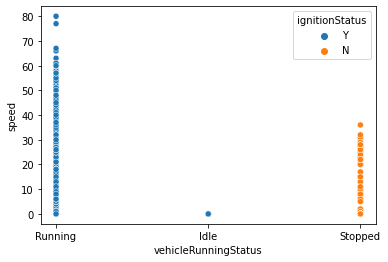

In [14]:

sns.scatterplot(x="vehicleRunningStatus",y="speed",data=lp,hue="ignitionStatus")

print(lp["license_plate"].value_counts())
# lp[lp["license_plate"]=="UP 65 JT 7322remove"]



In [15]:
lp[(lp["license_plate"]=="UP65KT0868(remove)")|(lp["license_plate"]=="UP 65 JT 7322remove")]

,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,bearing,ignitionStatus,date,type,lat,long


<AxesSubplot:>

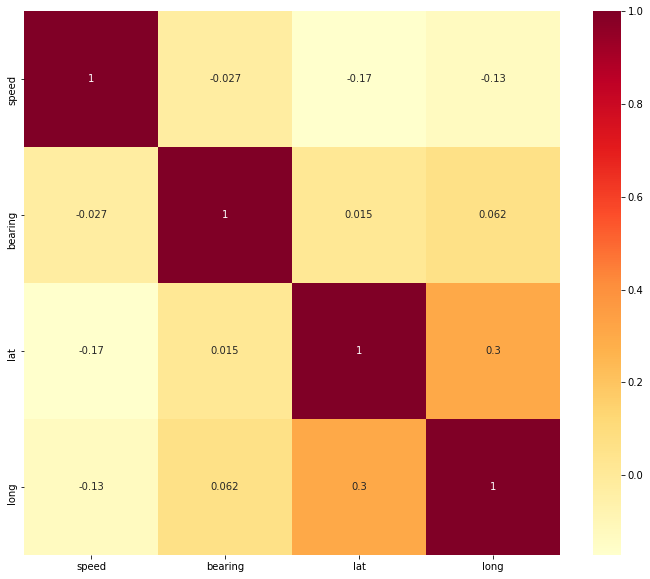

In [16]:

# sns.scatterplot(x="speed",y="bearing",data=lp)
fig = plt.figure(figsize = (12,10))
sns.heatmap(lp.corr(), cmap='YlOrRd', annot = True)

#Inference
# Bearing and the Speed seem to be negatively correlated


## Fetching SWM Bin locations in Varanasi

In [17]:
 
# # SDK LATEST QUERY 
# # STATIC BIN LOCATIONS
# from iudx.rs.ResourceServer import ResourceServer
# from iudx.rs.ResourceQuery import ResourceQuery

# # ID ="varanasismartcity.gov.in/62d1f729edd3d2a1a090cb1c6c89356296963d55/rs.iudx.org.in/varanasi-swm-additional-info/employee-info"

# itemid = "varanasismartcity.gov.in/62d1f729edd3d2a1a090cb1c6c89356296963d55/rs.iudx.org.in/varanasi-swm-additional-info/varanasi-swm-bin-details"

# # entity id for the pune env aqm sensor.
# entity_id = itemid
# # creating an object of ResourceServer class using rs_url.
# rs = ResourceServer(
#          rs_url="https://rs.iudx.org.in/ngsi-ld/v1",
#          headers={
#                  "content-type": "application/json",
#                  "token":getToken(itemid,"public")
#                  }
# )

# # creating a query for fetching latest data for the entity_id.
# rs_query = ResourceQuery()
# rs_entity = rs_query.add_entity(entity_id)

# # fetch results for a list of entities.
# results = rs.get_latest([rs_entity])

# res = results[0].results
# staticBins = pd.DataFrame(res)
# staticBins

# staticBins['type'] = staticBins['location'].apply(lambda x: x['type'])
# staticBins['lat'] = staticBins['location'].apply(lambda x: x['coordinates'][1])
# staticBins['long'] = staticBins['location'].apply(lambda x: x['coordinates'][0])
# staticBins['rfID'] = staticBins["deviceInfo"].apply(lambda x: x["rfID"])
# staticBins['deviceID'] = staticBins["deviceInfo"].apply(lambda x: x["deviceID"])

# staticBins.drop(["id","location","deviceInfo"],axis=1,inplace=True)
# staticBins

In [18]:
# Fetched data dump through CLI command
from ast import literal_eval
staticBins = pd.read_csv('bins.csv')


In [19]:
checkDuplicates(staticBins)

Duplicates found in the dataset ...
Total packet count :  816
Total duplicate packet count : 50
Percentage of duplicates :  6.13 %


'Removed Duplicates ...'

In [20]:
staticBins['location.coordinates'] = staticBins['location.coordinates'].apply(lambda x : literal_eval(x))
staticBins['lat'] = staticBins['location.coordinates'].apply(lambda x: x[1])
staticBins['long'] = staticBins['location.coordinates'].apply(lambda x: x[0])
staticBins

,binCapacity,id,wardID,binColor,binID,binCategory,binFullnessThreshold,location.coordinates,location.type,deviceInfo.rfID,deviceInfo.deviceID,lat,long
0,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,7,Green,1127,Dustbin,80,"[82.99697, 25.35382]",Point,E200637C923288716614A621,GBIN001127,25.353820,82.996970
1,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,4,Green,1128,Dustbin,80,"[82.98547, 25.31205]",Point,E2000015350501841300942F,GBIN001128,25.312050,82.985470
2,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,80,Green,113,Dustbin,80,"[83.004438, 25.330426]",Point,E200637C9218E1B166143F86,GBIN000307,25.330426,83.004438
3,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,4,Green,1130,Dustbin,80,"[82.98625, 25.31203]",Point,E200637C923787716614BA1D,GBIN001130,25.312030,82.986250
4,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,4,Green,1132,Dustbin,80,"[82.9857, 25.3121]",Point,E200637C9236E2B16614B78A,GBIN001132,25.312100,82.985700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,34,Green,107,Dustbin,80,"[82.990671, 25.342457]",Point,E200637C9203FB716613E97D,GBIN000225,25.342457,82.990671
763,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,20,Green,108,Dustbin,80,"[82.990642, 25.339095]",Point,E200637C9226093166147424,GBIN000204,25.339095,82.990642
764,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,4,Green,1083,Dustbin,80,"[82.98591, 25.31201]",Point,E200637C923309716614A825,GBIN001083,25.312010,82.985910
782,1.1,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,4,Green,1121,Dustbin,80,"[82.98584, 25.31203]",Point,E2000015350501901290966A,GBIN001121,25.312030,82.985840


In [21]:
lp["license_plate"].unique()

array(['UP65KT0413', 'HP97 7103', 'UP65CW6965', 'UP65JT7281',
       'UP65JT7307', 'UP65JT7322', 'UP65DT3342', 'UP-65-KT-1071',
       'UP65JT 7312', 'UP65GT2954', 'UP65 JT 7277', 'UP65KT1068',
       'UP65JT 7296', 'UP65JT7311', 'UP65 JT 7285', 'UP65JT7316',
       'UP65KT1060 ', 'UP65JT 7279', 'UP65DT5023', 'UP65JT7318',
       'UP65JT 7295', 'UP65GT9528', 'UP65KT1064', 'UP65KT1074',
       'UP65HT3953', 'UP65AG0452', 'UP65JT7293', 'UP65 JT 7294',
       'UP65KT 0409', 'UP65JT7274', 'UP65JT 7292', 'UP65GT5670',
       'UP65DT7328', 'UP65KT1067', 'UP65JT7278', 'UP65JT8253',
       'UP65 JT 7317', 'UP65GT9526', 'UP65GT9518', 'UP65JT7276',
       'UP-65-KT-1063', 'UP65JT 7314', 'UP65JT9928', 'UP65FT7960',
       'UP65JT7313 ', 'UP-65-KT-1072', 'UP65DT3339', 'UP65JT7297',
       'UP65KT0410', 'UP65DT5655', 'UP65 JT 7304', 'UP65JT9927',
       'UP65BT3495', 'UP65JT7283', 'UP65JT7289', 'UP65DT1074',
       'UP65JT7284', 'UP65KT0867', 'UP65 JT 7282', 'UP65HT3950',
       'UP65HT5228', 'UP65

##### Visualising the route of a particular vehicle through all the waste bins available

In [22]:
def visualizeRoute(licensePlate):
    vhcle = lp[lp["license_plate"]==licensePlate].sort_values(by=["observationDateTime"])
    vhcle.reset_index(inplace=True)
#     display(vhcle)
    fig,ax1=plt.subplots(figsize=(30,20))
    sns.scatterplot(x="lat",y="long",data=staticBins,marker="^",color="lightblue",s=150,ax=ax1)
    sns.scatterplot(x="lat",y="long",data = vhcle,hue="vehicleRunningStatus",style="ignitionStatus",palette="autumn",ax=ax1,s=100).set_title("Vehicle Running Status")

    ax1.set_xlim(lp["lat"].min(),lp["lat"].max())
    ax1.set_ylim(lp["long"].min(),lp["long"].max())

    plt.show()


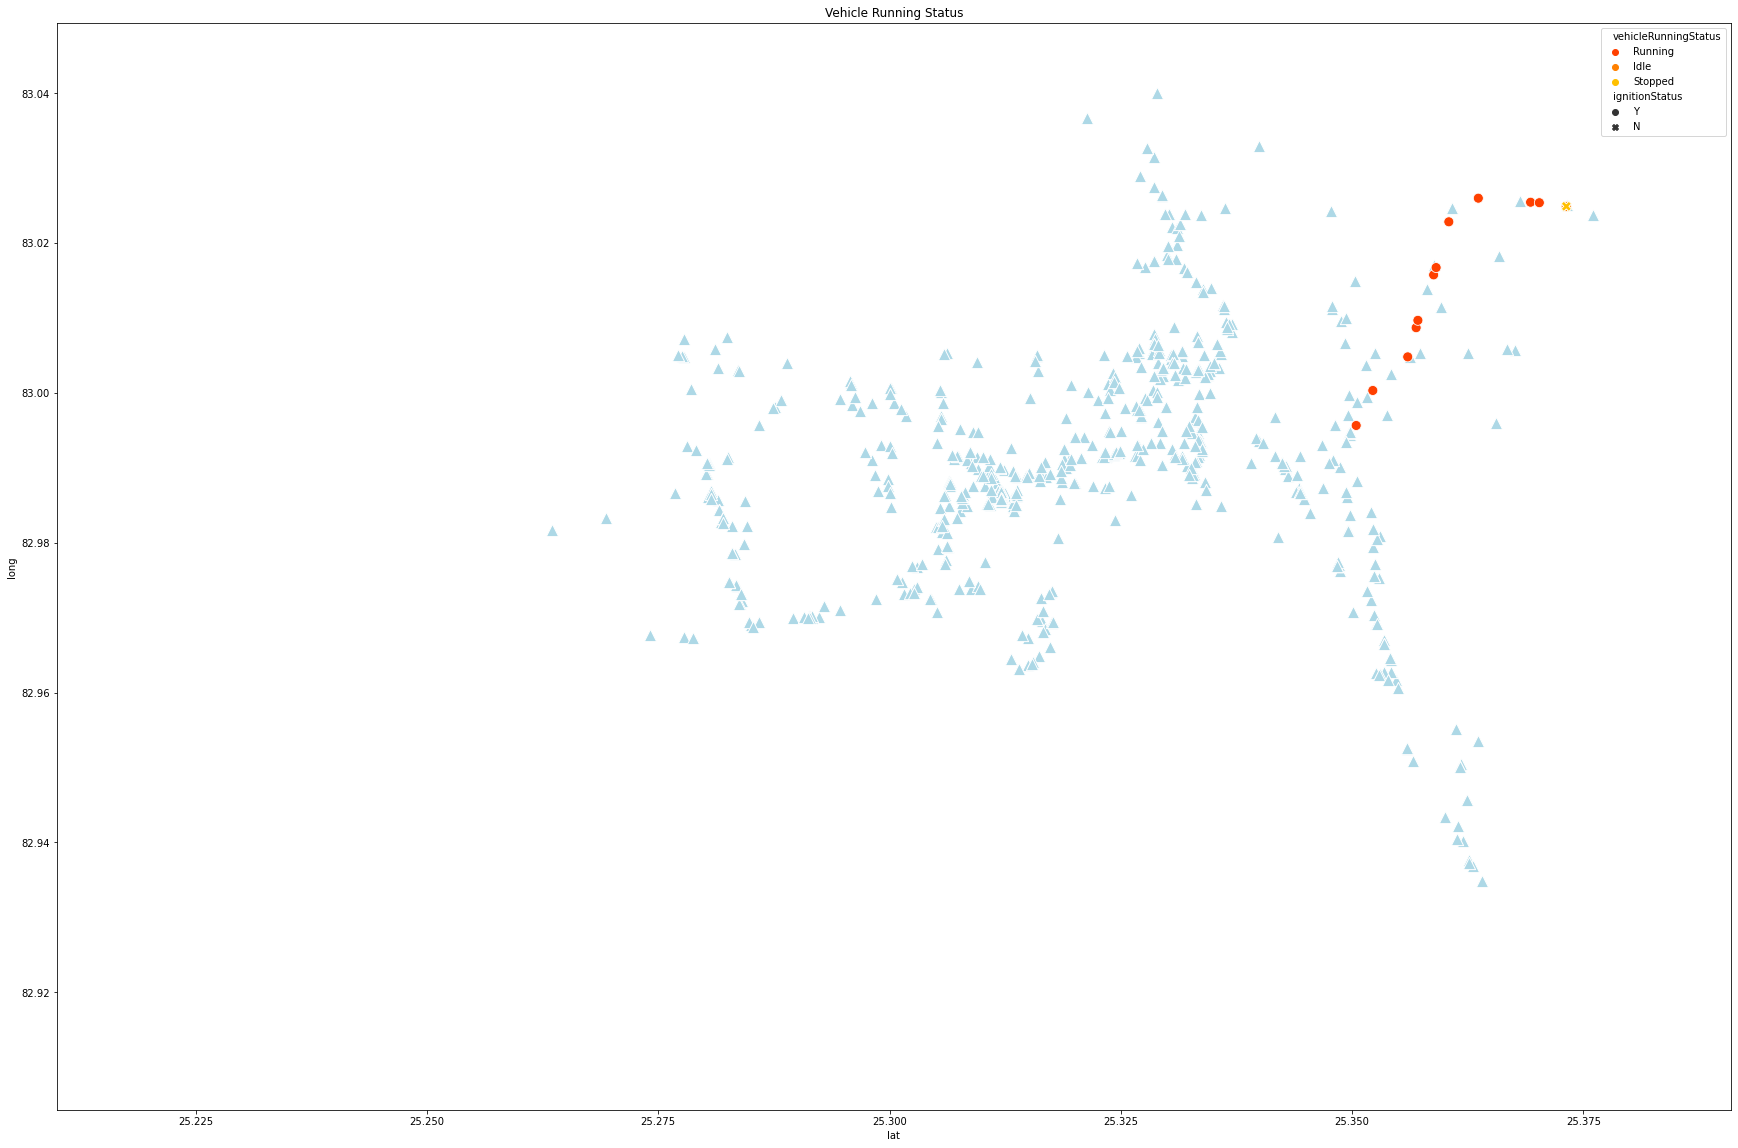

In [23]:
visualizeRoute("UP65GT5670")  

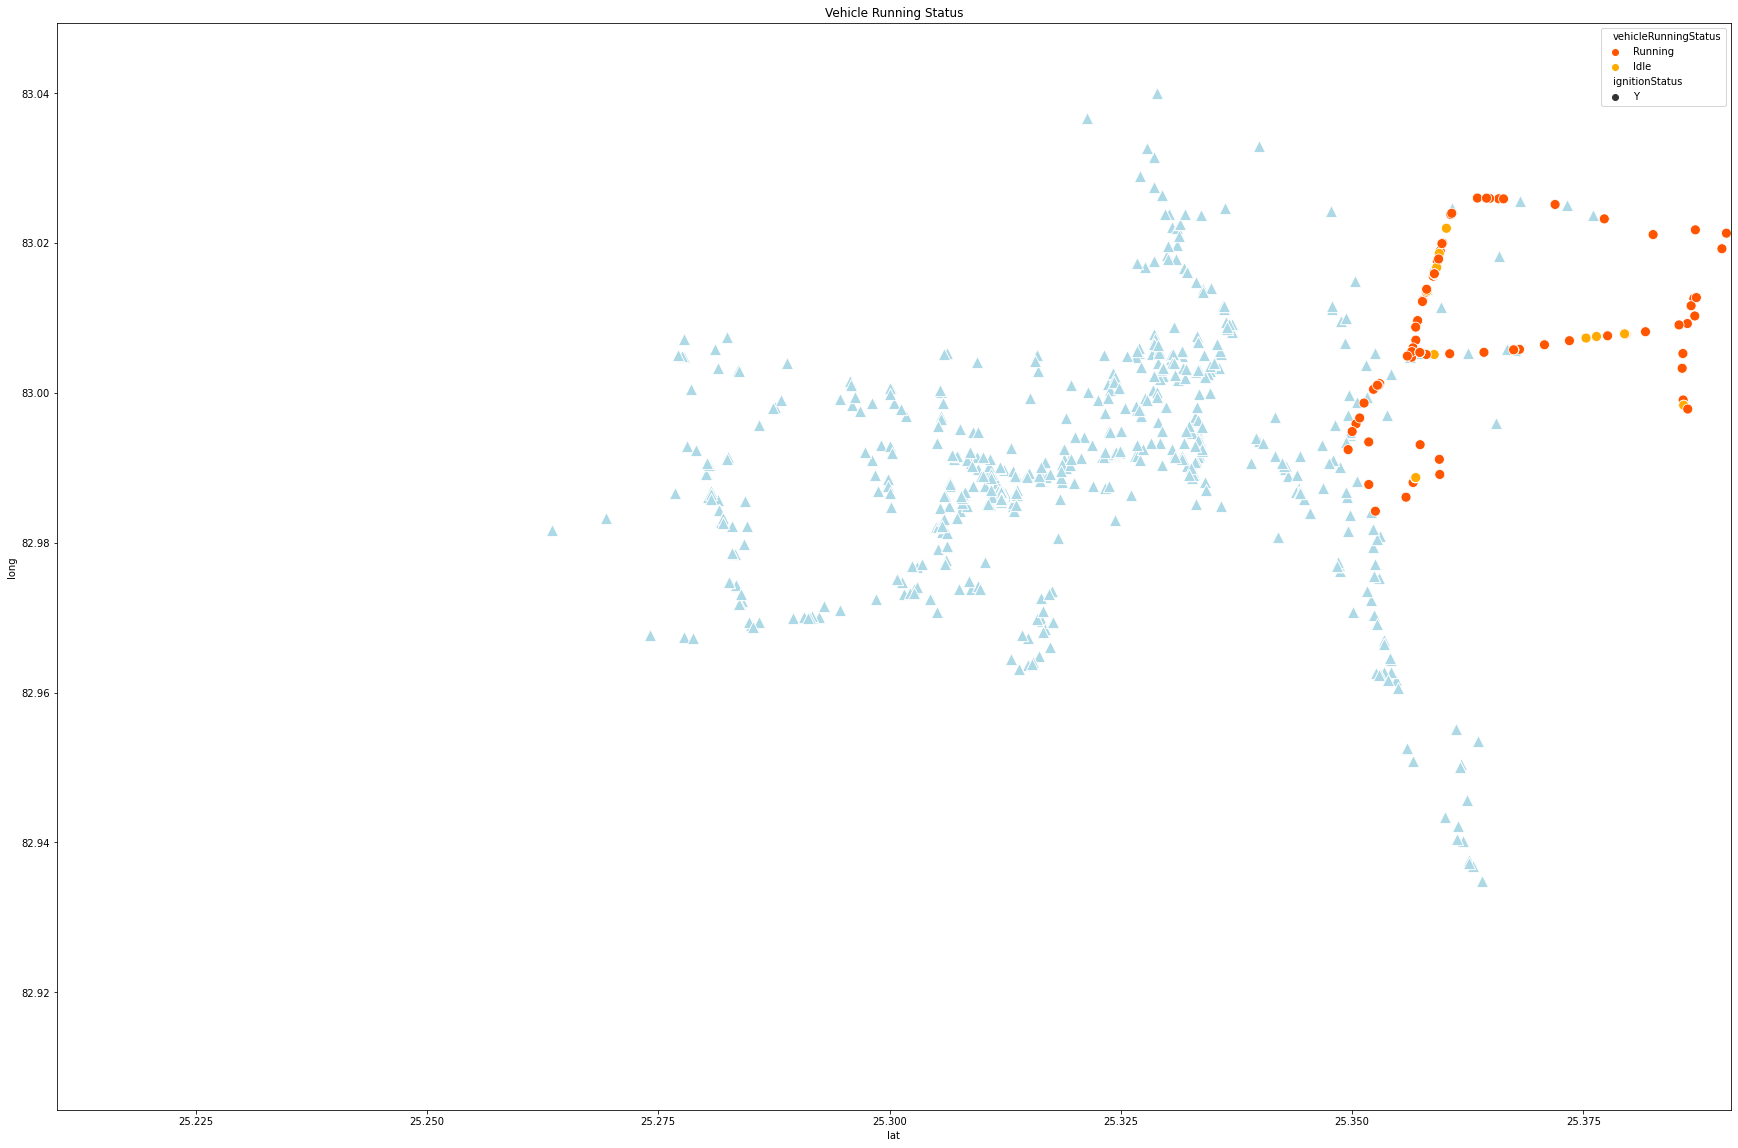

In [24]:
visualizeRoute("UP65KT1068")    

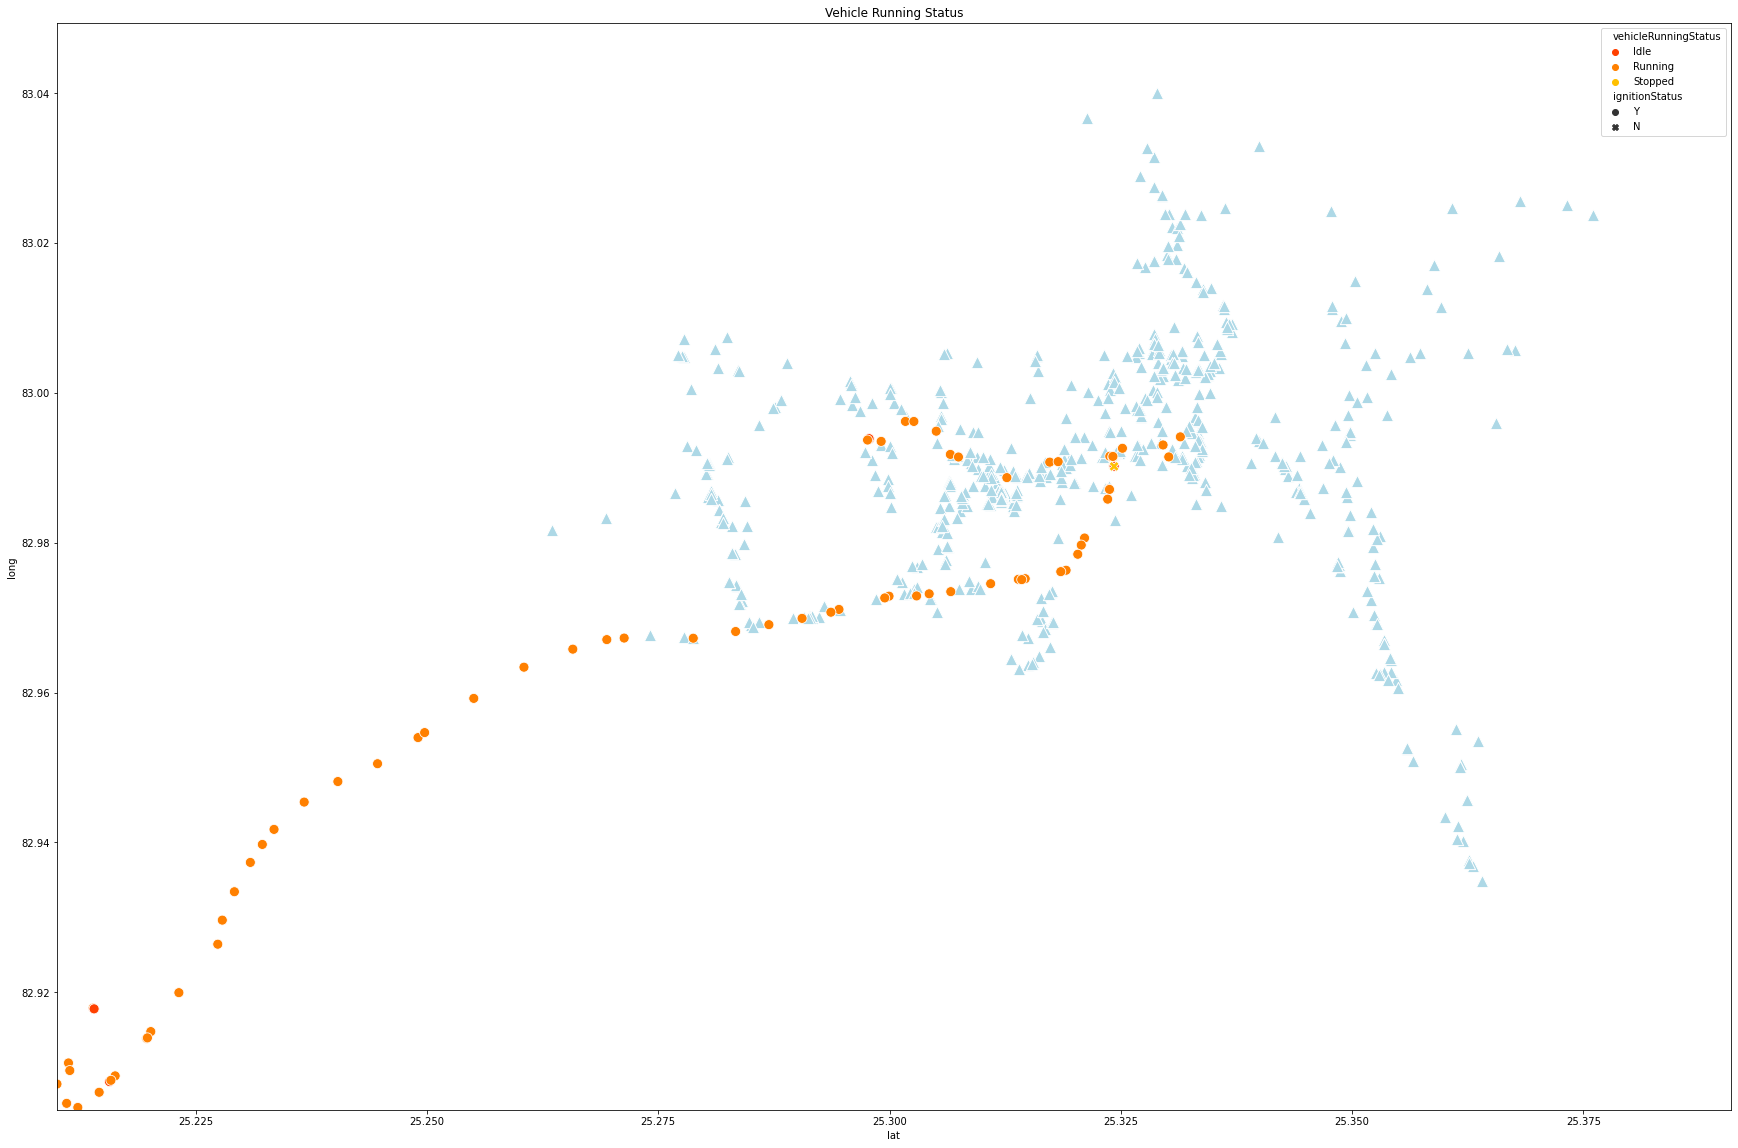

In [25]:
visualizeRoute("UP65KT0410")    

In [26]:
def euclideanDistance(x1,y1,x2,y2):
    D = ((x2-x1)**2+(y2-y1)**2)**(1/2) 
    return D

In [27]:
lp_arr = lp["license_plate"].unique()
lp_arr = list(lp_arr)
lp_arr
df = pd.DataFrame(staticBins[["binID","location.coordinates"]])
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,binID,location.coordinates
0,1127,"[82.99697, 25.35382]"
1,1128,"[82.98547, 25.31205]"
2,113,"[83.004438, 25.330426]"
3,1130,"[82.98625, 25.31203]"
4,1132,"[82.9857, 25.3121]"
...,...,...
761,107,"[82.990671, 25.342457]"
762,108,"[82.990642, 25.339095]"
763,1083,"[82.98591, 25.31201]"
764,1121,"[82.98584, 25.31203]"


In [28]:
df2 = lp1[lp1["license_plate"]=="UP65KT0410"][["license_plate","location"]].reset_index()
df2.drop(["index"],axis=1,inplace = True)
df2["coords"] = df2["location"].apply(lambda x : str(x["coordinates"]))
df2.drop(["location","license_plate"],axis=1,inplace = True)
df2 = df2.T
df2
df2.rename(columns = df2.loc["coords"],inplace = True)
df2.drop(["coords"],axis=0,inplace=True)
df2

,"[82.99382, 25.297838]","[82.993882, 25.29778]","[82.993693, 25.29762]","[82.993512, 25.299092]","[82.996175, 25.301712]","[82.99617, 25.302628]","[82.99487, 25.305047]","[82.991775, 25.30657]","[82.991427, 25.307448]","[82.988677, 25.312678]",...,"[82.975068, 25.314287]","[82.976133, 25.318507]","[82.978453, 25.320343]","[82.985803, 25.323575]","[82.99144, 25.330178]","[82.994117, 25.331432]","[82.993033, 25.329563]","[82.992593, 25.325173]","[82.991502, 25.324142]","[82.990177, 25.32427]"


In [29]:
df3 = df.append(df2)
df3

,binID,location.coordinates,"[82.99382, 25.297838]","[82.993882, 25.29778]","[82.993693, 25.29762]","[82.993512, 25.299092]","[82.996175, 25.301712]","[82.99617, 25.302628]","[82.99487, 25.305047]","[82.991775, 25.30657]",...,"[82.975068, 25.314287]","[82.976133, 25.318507]","[82.978453, 25.320343]","[82.985803, 25.323575]","[82.99144, 25.330178]","[82.994117, 25.331432]","[82.993033, 25.329563]","[82.992593, 25.325173]","[82.991502, 25.324142]","[82.990177, 25.32427]"
0,1127.0,"[82.99697, 25.35382]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1128.0,"[82.98547, 25.31205]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,113.0,"[83.004438, 25.330426]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1130.0,"[82.98625, 25.31203]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1132.0,"[82.9857, 25.3121]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,107.0,"[82.990671, 25.342457]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,108.0,"[82.990642, 25.339095]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,1083.0,"[82.98591, 25.31201]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,1121.0,"[82.98584, 25.31203]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
col = list(df3.columns)

for ind in df3.index :
    for i in range(2,len(col)):
        df3.iloc[ind,i]= euclideanDistance(df3.iloc[ind,1][0],df3.iloc[ind,1][1],literal_eval(col[i])[0],literal_eval(col[i])[1])

# df3.iloc[0,2] = euclideanDistance(df3.iloc[0,1][0],df3.iloc[0,1][1],literal_eval(col[2])[0],literal_eval(col[2])[1])
# print(df3.iloc[0,1][0])
# print(literal_eval(col[2])[0])


In [31]:
df3

,binID,location.coordinates,"[82.99382, 25.297838]","[82.993882, 25.29778]","[82.993693, 25.29762]","[82.993512, 25.299092]","[82.996175, 25.301712]","[82.99617, 25.302628]","[82.99487, 25.305047]","[82.991775, 25.30657]",...,"[82.975068, 25.314287]","[82.976133, 25.318507]","[82.978453, 25.320343]","[82.985803, 25.323575]","[82.99144, 25.330178]","[82.994117, 25.331432]","[82.993033, 25.329563]","[82.992593, 25.325173]","[82.991502, 25.324142]","[82.990177, 25.32427]"
0,1127.0,"[82.99697, 25.35382]",0.056071,0.056125,0.056295,0.054837,0.052114,0.051198,0.048818,0.047535,...,0.045195,0.041002,0.038257,0.032241,0.02428,0.022569,0.024574,0.028979,0.030178,0.030321
1,1128.0,"[82.98547, 25.31205]",0.016483,0.016565,0.016609,0.015251,0.014882,0.014257,0.011722,0.008354,...,0.01064,0.011352,0.010863,0.01153,0.019086,0.021223,0.019076,0.014932,0.013513,0.013095
2,113.0,"[83.004438, 25.330426]",0.034274,0.03431,0.034521,0.033184,0.029879,0.029002,0.027123,0.027009,...,0.033512,0.030712,0.027873,0.019854,0.013,0.01037,0.011438,0.012958,0.014382,0.015533
3,1130.0,"[82.98625, 25.31203]",0.016085,0.016165,0.016219,0.014837,0.014317,0.013668,0.011094,0.007768,...,0.011408,0.012013,0.011397,0.011554,0.018876,0.020936,0.018799,0.014594,0.013202,0.012855
4,1132.0,"[82.9857, 25.3121]",0.016412,0.016493,0.01654,0.015174,0.014752,0.014119,0.011569,0.008215,...,0.010855,0.011514,0.010976,0.011475,0.018967,0.021085,0.01894,0.014779,0.013367,0.012967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,107.0,"[82.990671, 25.342457]",0.04473,0.044792,0.044939,0.043458,0.041115,0.040207,0.037645,0.035904,...,0.032203,0.028017,0.025265,0.019499,0.012303,0.011551,0.013109,0.017391,0.018334,0.018194
762,108.0,"[82.990642, 25.339095]",0.041379,0.041442,0.041587,0.040106,0.03779,0.036884,0.03431,0.032545,...,0.029291,0.025187,0.022365,0.016257,0.008953,0.008414,0.009827,0.014058,0.014978,0.014832
763,1083.0,"[82.98591, 25.31201]",0.01623,0.016311,0.01636,0.014989,0.01454,0.013903,0.011347,0.007999,...,0.011079,0.011739,0.011182,0.011565,0.018991,0.021085,0.018943,0.014762,0.013359,0.012981
764,1121.0,"[82.98584, 25.31203]",0.016282,0.016363,0.016411,0.015042,0.014604,0.013968,0.011415,0.008064,...,0.011006,0.01167,0.011121,0.011545,0.018992,0.021094,0.018951,0.014776,0.01337,0.012986


In [32]:
df3.shape

(766, 83)

In [33]:
# df3.apply(lambda x : x.min(),axis =1)
# for i in range(2,len(col)):
#     print(df3[col[i]].min())
L = [ df3[col[i]].min() for i in range(2,len(col)) ]
L.sort()
wandering = [i for i in L if i>0.009]
wandering

L[-5:]

[0.08523269574523376,
 0.08548076441515481,
 0.08772378720735194,
 0.08829205683411767,
 0.08875618502954953]

In [34]:
lp.columns

Index(['license_plate', 'wardID', 'speed', 'vehicleType',
       'observationDateTime', 'deviceBatteryStatus', 'vehicleRunningStatus',
       'bearing', 'ignitionStatus', 'date', 'type', 'lat', 'long'],
      dtype='object')

In [36]:
[0.0012455753690493033,
 0.0014710540438692063,
 0.001707369028652237,
 0.0030839606028666023,
 0.003342626063449022] "UP65GT5670"

In [ ]:
[0.018262855034195738,
 0.019399950747363465,
 0.01970137477436982,
 0.019704207494846745,
 0.020305384753804615] "UP65KT1068"

In [37]:
[0.08523269574523376,
 0.08548076441515481,
 0.08772378720735194,
 0.08829205683411767,
 0.08875618502954953] "UP65KT0410"

SyntaxError: invalid syntax (2475159681.py, line 5)

In [ ]:
aqa = lp[lp["license_plate"]=="UP65KT0410"]
aqa
sns.lineplot(x="observationDateTime",y ="long",data = aqa)
plt.xticks(rotation=90)

In [56]:
lp1=lp[lp["license_plate"]=="UP65KT0410"]
lp1

,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,bearing,ignitionStatus,date,type,lat,long,geometry
170,UP65KT0410,40,0.0,Auto Tipper,2022-02-20 07:48:22+05:30,Disconnected,Idle,184.0,Y,2022-02-20,Point,25.297838,82.993820,POINT (82.99382 25.29784)
203,UP65KT0410,40,0.0,Auto Tipper,2022-02-20 07:49:19+05:30,Disconnected,Idle,204.0,Y,2022-02-20,Point,25.297780,82.993882,POINT (82.99388 25.29778)
257,UP65KT0410,40,4.0,Auto Tipper,2022-02-20 07:50:26+05:30,Disconnected,Running,219.0,Y,2022-02-20,Point,25.297620,82.993693,POINT (82.99369 25.29762)
282,UP65KT0410,45,24.0,Auto Tipper,2022-02-20 07:51:51+05:30,Disconnected,Running,35.0,Y,2022-02-20,Point,25.299092,82.993512,POINT (82.99351 25.29909)
325,UP65KT0410,45,13.0,Auto Tipper,2022-02-20 07:52:50+05:30,Disconnected,Running,1.0,Y,2022-02-20,Point,25.301712,82.996175,POINT (82.99617 25.30171)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,UP65KT0410,20,29.0,Auto Tipper,2022-02-20 09:53:36+05:30,Disconnected,Running,241.0,Y,2022-02-20,Point,25.331432,82.994117,POINT (82.99412 25.33143)
4576,UP65KT0410,18,5.0,Auto Tipper,2022-02-20 09:54:46+05:30,Disconnected,Running,138.0,Y,2022-02-20,Point,25.329563,82.993033,POINT (82.99303 25.32956)
4637,UP65KT0410,41,22.0,Auto Tipper,2022-02-20 09:56:04+05:30,Disconnected,Running,220.0,Y,2022-02-20,Point,25.325173,82.992593,POINT (82.99259 25.32517)
4678,UP65KT0410,41,12.0,Auto Tipper,2022-02-20 09:57:10+05:30,Disconnected,Running,260.0,Y,2022-02-20,Point,25.324142,82.991502,POINT (82.99150 25.32414)


In [57]:
coords = [ [float(row["lat"]),float(row["long"]),row["observationDateTime"],row["vehicleRunningStatus"]] for index, row in lp1.iterrows()]  
coords

[[25.297838,
  82.99382,
  Timestamp('2022-02-20 07:48:22+0530', tz='pytz.FixedOffset(330)'),
  'Idle'],
 [25.29778,
  82.993882,
  Timestamp('2022-02-20 07:49:19+0530', tz='pytz.FixedOffset(330)'),
  'Idle'],
 [25.29762,
  82.993693,
  Timestamp('2022-02-20 07:50:26+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.299092,
  82.993512,
  Timestamp('2022-02-20 07:51:51+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.301712,
  82.996175,
  Timestamp('2022-02-20 07:52:50+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.302628,
  82.99617,
  Timestamp('2022-02-20 07:53:09+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.305047,
  82.99487,
  Timestamp('2022-02-20 07:54:23+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.30657,
  82.991775,
  Timestamp('2022-02-20 07:55:20+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.307448,
  82.991427,
  Timestamp('2022-02-20 07:55:33+0530', tz='pytz.FixedOffset(330)'),
  'Running'],
 [25.312678,
  82.988677,
  Tim

In [58]:
# !pip install follium
# !pip3 install folium
# https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717
# https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/
# https://notebook.community/racu10/emapy/notebooks/Colormaps
# https://python-visualization.github.io/folium/modules.html
import folium
from folium.plugins import MarkerCluster
varanasi_coords =[25.327729, 82.983553]
my_map = folium.Map(location = varanasi_coords, zoom_start = 10)

# folium.Marker(i[0:2], popup = i[2], color ="purple").add_to(my_map)
# def plot(latLongPair):
#      folium.Marker(latLongPair[0:2], popup = latLongPair[2]).add_to(my_map)
a = [ folium.Marker(i[0:2], popup = i[2]).add_to(my_map) for i in coords]


my_map

In [59]:
my_map = folium.Map(location = varanasi_coords, zoom_start = 10)
b = [ folium.CircleMarker(i[0:2], popup = i[2], radius=5).add_to(my_map) for i in coords]
# folium.CircleMarker(location=coords[0][0:2],radius=1).add_to(my_map)
my_map

In [60]:
lp1
import branca.colormap as cm
colormap = cm.StepColormap(colors=['red','yellow','orange'] ,
                           index=["Stopped","Idle","Running"],
                          )
c = [ folium.Circle(location=i[0:2],radius=2, fill=True, color=colormap(i[3])).add_to(my_map) for i in coords]
my_map

In [61]:
colormap("a")

'#ffa500ff'

In [62]:
colormap("Idle")

'#ff0000ff'

In [63]:
colormap("Running")

'#ff0000ff'

In [64]:
step = cm.StepColormap(['green', 'yellow', 'red'],
                       vmin=3, vmax=10, index=[3, 4, 8, 10],
                       caption='step')

step

In [65]:
linear = cm.LinearColormap(['green', 'yellow', 'red'],
                           vmin=3, vmax=10)

linear

In [66]:
# python3
from platform import python_version

print(python_version())

3.8.10


In [67]:

# import follium
# python -m pip install folium

In [68]:
# !pip install geopandas

import geopandas as gpd
import plotly.express as px
df_geo = gpd.GeoDataFrame(lp , geometry = gpd.points_from_xy(lp["long"],lp['lat']))
df_geo

,license_plate,wardID,speed,vehicleType,observationDateTime,deviceBatteryStatus,vehicleRunningStatus,bearing,ignitionStatus,date,type,lat,long,geometry
0,UP65KT0413,38,28.0,Dumper,2022-02-20 07:42:08+05:30,Disconnected,Running,269.0,Y,2022-02-20,Point,25.345525,82.983405,POINT (82.98341 25.34552)
1,HP97 7103,10,0.0,Sweeping Machine,2022-02-20 07:42:01+05:30,Disconnected,Idle,104.0,Y,2022-02-20,Point,25.364967,82.933867,POINT (82.93387 25.36497)
2,UP65CW6965,4,0.0,Tractor,2022-02-20 07:42:05+05:30,Disconnected,Stopped,108.0,N,2022-02-20,Point,25.313317,82.985510,POINT (82.98551 25.31332)
3,UP65JT7281,10,7.0,Auto Tipper,2022-02-20 07:42:03+05:30,Disconnected,Running,105.0,Y,2022-02-20,Point,25.363457,82.957188,POINT (82.95719 25.36346)
4,UP65JT7307,38,0.0,Auto Tipper,2022-02-20 07:42:00+05:30,Disconnected,Stopped,269.0,N,2022-02-20,Point,25.352633,82.982838,POINT (82.98284 25.35263)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UP65JT7307,38,0.0,Auto Tipper,2022-02-20 10:05:13+05:30,Disconnected,Idle,114.0,Y,2022-02-20,Point,25.352153,82.985425,POINT (82.98543 25.35215)
4996,UP65DT3331,79,22.0,Dumper,2022-02-20 10:05:06+05:30,Disconnected,Stopped,194.0,N,2022-02-20,Point,25.299017,82.972583,POINT (82.97258 25.29902)
4997,UP65HT0322,29,5.0,Auto Tipper,2022-02-20 10:05:01+05:30,Disconnected,Stopped,78.0,N,2022-02-20,Point,25.280300,82.990540,POINT (82.99054 25.28030)
4998,UP65JT 7308,17,0.0,Auto Tipper,2022-02-20 10:04:41+05:30,Disconnected,Idle,188.0,Y,2022-02-20,Point,25.368390,82.970817,POINT (82.97082 25.36839)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

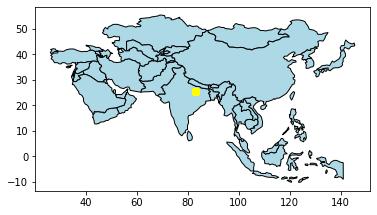

In [69]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
display(world_data)
axis = world_data[world_data.continent=="Asia"].plot(color = "lightblue",edgecolor = "black")

df_geo.plot(ax = axis , color = 'yellow')

In [70]:
import pandas as pd
s = pd.read_csv("./Varanasi SWM/sample1.csv")
s

,vehicleRunningStatus,bearing,license_plate,ignitionStatus,deviceBatteryStatus,observationDateTime,id,speed,location,wardID,vehicleType
0,Running,122.0,UP65GT5670,Y,Disconnected,2022-02-21T23:00:15+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,20.0,"{'type': 'Point', 'coordinates': [82.915887, 2...",0,Hydraulic Lifter
1,Running,13.0,UP65DT3339,Y,Disconnected,2022-02-21T23:00:07+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,24.0,"{'type': 'Point', 'coordinates': [82.973118, 2...",59,Dumper
2,Running,4.0,UP65DT3341,Y,Disconnected,2022-02-21T23:00:11+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,30.0,"{'type': 'Point', 'coordinates': [82.967408, 2...",13,Dumper
3,Running,72.0,UP65DT3339,Y,Disconnected,2022-02-21T23:00:29+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,10.0,"{'type': 'Point', 'coordinates': [82.973415, 2...",59,Dumper
4,Idle,61.0,UP65KT1068,Y,Disconnected,2022-02-21T23:00:23+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,0.0,"{'type': 'Point', 'coordinates': [83.020602, 2...",44,Auto Tipper
...,...,...,...,...,...,...,...,...,...,...,...
208008,Stopped,236.0,UP65HT3953,N,Connected,2022-02-14T23:59:30+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,0.0,"{'type': 'Point', 'coordinates': [83.01488, 25...",87,Refused Compactor
208009,Running,215.0,UP65KT1074,Y,Connected,2022-02-14T23:59:22+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,18.0,"{'type': 'Point', 'coordinates': [82.90873, 25...",0,Refused Compactor
208010,Idle,303.0,UP65KT1067,Y,Disconnected,2022-02-14T23:59:54+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,0.0,"{'type': 'Point', 'coordinates': [82.9992, 25....",67,Auto Tipper
208011,Running,241.0,UP65KT1074,Y,Connected,2022-02-14T23:59:52+05:30,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,14.0,"{'type': 'Point', 'coordinates': [82.90784, 25...",0,Refused Compactor


In [71]:
s[s.duplicated()].shape
checkDuplicates(s)

Duplicates found in the dataset ...
Total packet count :  208013
Total duplicate packet count : 37
Percentage of duplicates :  0.02 %


'Removed Duplicates ...'

In [72]:
s[s.duplicated()]

,vehicleRunningStatus,bearing,license_plate,ignitionStatus,deviceBatteryStatus,observationDateTime,id,speed,location,wardID,vehicleType
